In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

In [2]:
identity = np.array([[0.,0.,0.],
                     [0.,1.,0.],
                     [0.,0.,0.]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
gaussian = (1 / 16.0) * np.array([[1., 2., 1.],
                                  [2., 4., 2.],
                                  [1., 2., 1.]])

gaussian_5x5 = (1/256.0)*np.array([[1., 4., 6., 4., 1.],
                                   [4., 16., 24., 16., 4.],
                                   [6., 24., 36., 24., 6.],
                                   [4., 16., 24., 16., 4.],
                                   ])
# for edges in X axis
sobel_edge_kernel_x = np.array([[1., 2., 1.],
                              [0., 0., 0.],
                              [-1., -2., -1]])
# for edges in Y axis
sobel_edge_kernel_y = np.array([[1., 0., -1.],
                              [2., 0., -2.],
                              [1., 0., -1.]])

In [3]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [4]:
def convolution_plotter(image, kernel):
    iterations = [0,1,2,5,10]
    f_size = 20
    
    fig, ax = plt.subplots(1,4, figsize = (15,7))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Iteration : {iterations[n]}', fontsize =
                     f_size)
        ax.imshow(multi_convolver(image, kernel, iterations[n]), 
                  cmap='gray')
        ax.set_axis_off()
    fig.tight_layout()

In [5]:
image1 = imread("frame_folder/harder_challenge_video/frame_0028.png")
image1 = rgb2gray(image1)

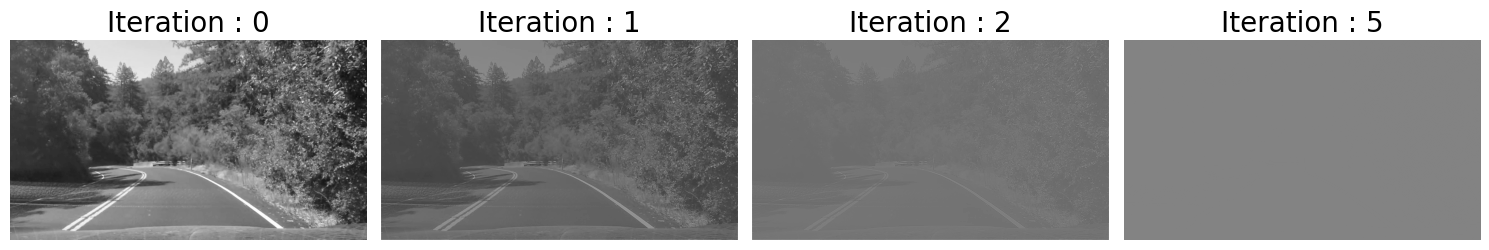

In [6]:
convolution_plotter(image1,sharpen)


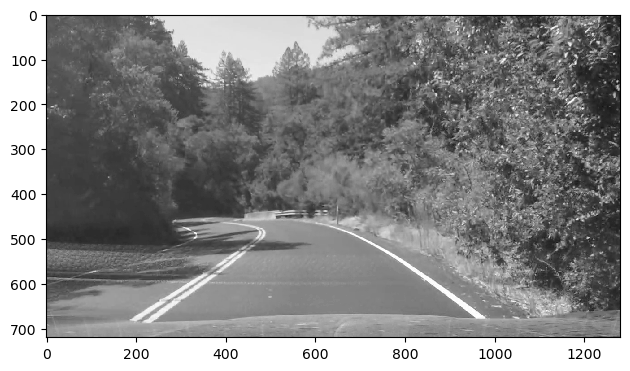

In [7]:
imshow(multi_convolver(image1,sharpen,0))

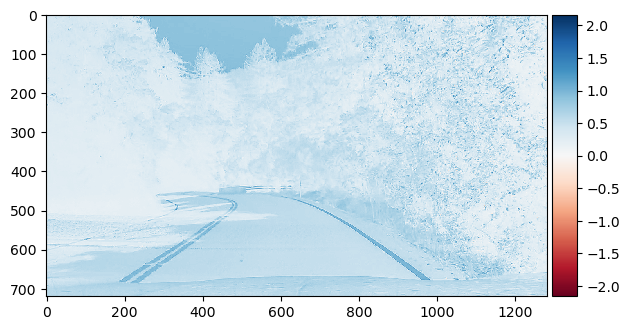

In [8]:
imshow(multi_convolver(image1,sharpen,1))

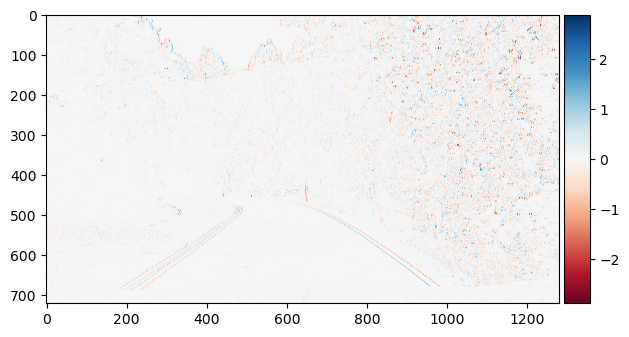

In [9]:
imshow(multi_convolver(image1,sobel_edge_kernel_y,1))

In [10]:
added_image  = multi_convolver(image1,sobel_edge_kernel_x,1)+multi_convolver(image1,sobel_edge_kernel_y,1)

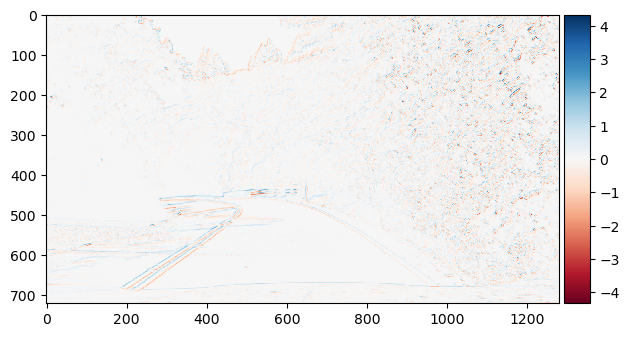

In [11]:
imshow(added_image)

/home/abhi/miniconda3/envs/pytorch/lib/python3.11/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


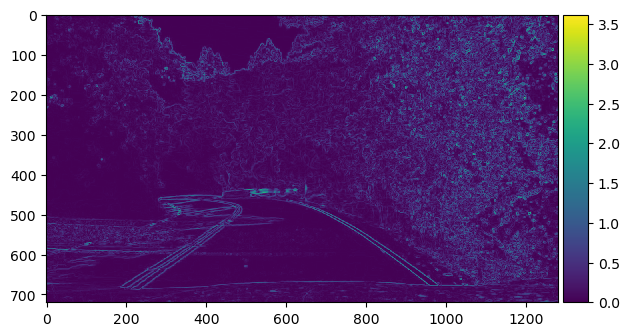

In [12]:
gradient_x = multi_convolver(image1, sobel_edge_kernel_x, 1)
gradient_y = multi_convolver(image1, sobel_edge_kernel_y, 1)

magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

imshow(magnitude)


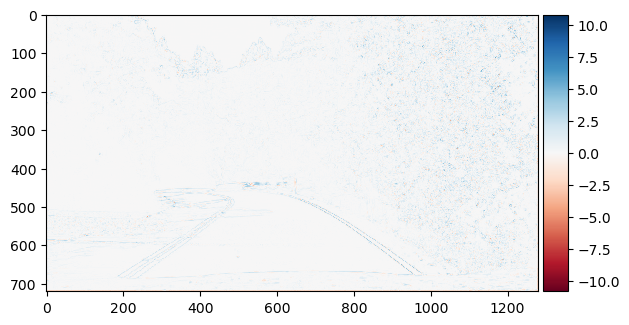

In [13]:
imshow(multi_convolver(magnitude,sharpen,1))

In [14]:
def convoperation(image,kernel):
    result = image
    for filter in kernel:
        result = cv2.filter2D(result, -1, filter)
# Display the original and convolved images
    cv2.imshow('Original Image', image)
    cv2.imshow('Convolved Image', result)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return result

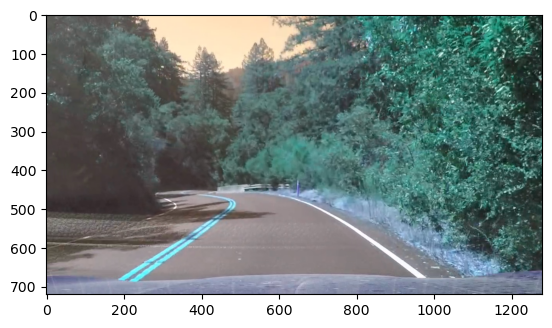

In [15]:
image = cv2.imread("frame_folder/harder_challenge_video/frame_0028.png")
plt.imshow(image)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread

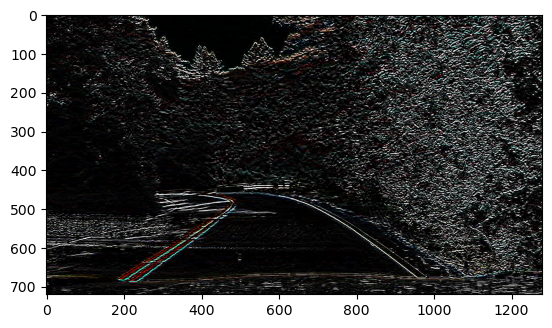

In [16]:
result = convoperation(image,[sharpen,sobel_edge_kernel_x])
plt.imshow(result)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread

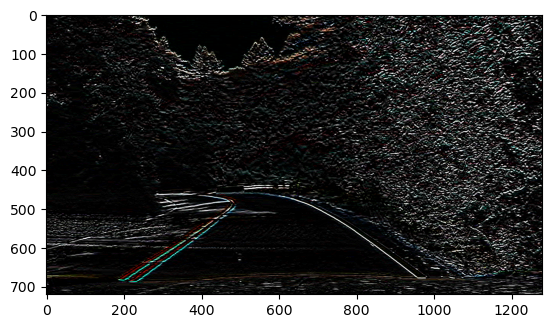

In [17]:
result = convoperation(image,[gaussian,sharpen,sobel_edge_kernel_x])
plt.imshow(result)

In [18]:
convoperation(image,gaussian)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread

array([[[3, 3, 2],
        [3, 3, 2],
        [3, 3, 2],
        ...,
        [1, 2, 2],
        [1, 2, 2],
        [1, 2, 2]],

       [[3, 3, 2],
        [3, 3, 2],
        [3, 3, 2],
        ...,
        [1, 2, 2],
        [1, 2, 2],
        [1, 2, 2]],

       [[3, 3, 2],
        [3, 3, 2],
        [3, 3, 2],
        ...,
        [1, 2, 2],
        [1, 2, 1],
        [1, 2, 1]],

       ...,

       [[4, 4, 5],
        [4, 4, 5],
        [4, 4, 5],
        ...,
        [3, 3, 4],
        [3, 4, 4],
        [3, 4, 4]],

       [[4, 4, 5],
        [4, 4, 5],
        [4, 4, 5],
        ...,
        [3, 3, 4],
        [3, 3, 4],
        [3, 3, 4]],

       [[4, 4, 5],
        [4, 4, 5],
        [4, 4, 5],
        ...,
        [3, 3, 4],
        [3, 3, 4],
        [3, 3, 4]]], dtype=uint8)

In [19]:
convoperation(image,gaussian_5x5)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [20]:
gradient_x = convoperation(image,sobel_edge_kernel_x)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread

In [21]:
gradient_y = convoperation(image,sobel_edge_kernel_y)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread

In [22]:
convoperation(image,identity)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread (0x9fc5a00).
Cannot move to target thread (0x1768db0)

QObject::moveToThread: Current thread (0x1768db0) is not the object's thread

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [23]:
gradient_x

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [24]:
import numpy as np

# Example vector
vector = np.array([[[-1, 2, 3, -4, 5]]])

result = np.power(vector, 2)

print(result)


[[[ 1  4  9 16 25]]]


In [25]:
test = np.power(gradient_x,2)
test

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [26]:
magnitude = (np.sqrt(np.power(gradient_x,2)+np.power(gradient_y,2)))
magnitude = magnitude.astype(np.int8)
magnitude

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [2, 2, 2],
        [0, 0, 0],
        [4, 4, 4]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=int8)

In [27]:

convoperation(magnitude,identity)

error: OpenCV(4.9.0) /io/opencv/modules/imgproc/src/filter.simd.hpp:3294: error: (-213:The function/feature is not implemented) Unsupported combination of source format (=17), and destination format (=17) in function 'getLinearFilter'
